<a href="https://colab.research.google.com/github/Fcazarez/DS-ML-Machine-Learning/blob/main/Group_2_UML_group_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Assignment :
## Group 2: TensorFlow neural network trained on the CIFAR-10 dataset

* Paola Katherine Pacheco
* Akshar Patel
* Elizer Lising
* Felix Cazarez
* Francisco Contreras
* Hamed Sharafeldin
* Jagnoor Sandhu
* Jerry Kwok
* Jose Quinatoa
* Rudra Gera
* Vivek Gajjar
* Xueyao Wang

Implementation should follow : \
Activity 5.01: The MNIST Neural Network \
Exercise 5.03: Defining a Keras Model\
Exercise 5.04: Training a Keras Neural Network Model

**Data:**

CIFAR10 is a subset of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. The dataset is available at CIFAR-10 and CIFAR-100 datasets (toronto.edu) and can also be loaded directly from TensorFlow using tf.keras.datasets.cifar10.load_data.

# 1. Data

**Import TensorFlow**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Load a dataset**

In [ ]:
# load and split the dataset
(X_train, y_train), (X_testing, y_testing) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
print('Total number of Images in the Dataset:', len(X_train) + len(X_testing))
print('Number of train images:', len(X_train))
print('Number of test images:', len(X_testing))
print('Shape of training dataset:', X_train.shape)
print('Shape of testing dataset:', X_testing.shape)

Total number of Images in the Dataset: 60000
Number of train images: 50000
Number of test images: 10000
Shape of training dataset: (50000, 32, 32, 3)
Shape of testing dataset: (10000, 32, 32, 3)


10 classes present in the CIFAR-10 dataset:

0. Airplane
1. Automobile
2. Bird
3. Cat
4. Deer
5. Dog
6. Frog
7. Horse
8. Ship
9. Truck

In [ ]:
# counts the number of elements each class in the training and testing sets
classes, counts_training = np.unique(y_train, return_counts=True)
classes, counts_testing = np.unique(y_testing, return_counts=True)

# add the counts of the training and testing sets
counts = np.add(counts_training, counts_testing)

In [ ]:
# define the labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

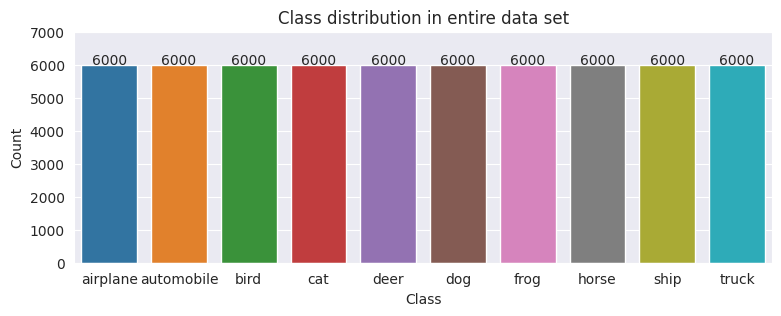

In [ ]:
# plot the number of elements in each class using seaborn
fig, ax = plt.subplots(figsize=(9, 3))
sns.set_style("darkgrid")
ax = sns.barplot(
    x=class_names,
    y=counts
    )

# show the counts above each bar
for i, v in enumerate(counts):
    ax.text(i, v, str(v), ha="center", fontsize=10)

# set the title and labels of the plot
ax.set_title("Class distribution in entire data set", fontsize=12)
ax.set_ylim([0, 7000])
ax.set_xlabel("Class", fontsize=10)
ax.set_ylabel("Count", fontsize=10)

plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_testing = X_train / 255.0, X_testing / 255.0

In [ ]:
# reshape the training and testing labels into 1D array
y_train = y_train.reshape((-1))
y_test = y_testing.reshape((-1))

In [ ]:
# split the testing set into validation and testing sets
# using 50% of the testing set for validation
X_test, X_val, y_test, y_val = train_test_split(X_testing,
                                                y_testing,
                                                test_size=0.5,
                                                random_state=80)

**Verify the data**

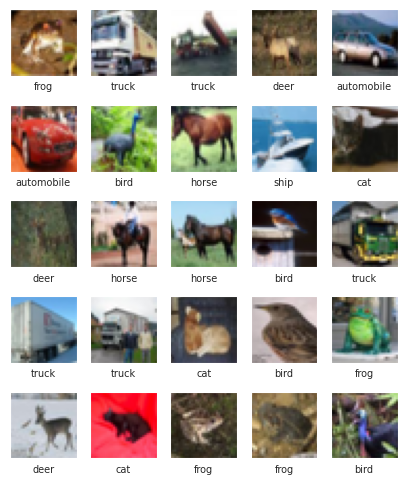

In [ ]:
plt.figure(figsize=(5, 6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]], fontsize=7)
plt.show()

**Create the convolutional base**

In [ ]:
# Build a tf.keras.Sequential model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


**Train and evaluate the model**

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 [==============================] - 23s 6ms/step - loss: 1.5989 - accuracy: 0.4144 - val_loss: 1.3063 - val_accuracy: 0.5426
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2381 - accuracy: 0.5633 - val_loss: 1.2368 - val_accuracy: 0.5622
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0944 - accuracy: 0.6153 - val_loss: 1.1519 - val_accuracy: 0.6068
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9947 - accuracy: 0.6516 - val_loss: 1.0225 - val_accuracy: 0.6498
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9269 - accuracy: 0.6759 - val_loss: 0.9884 - val_accuracy: 0.6578
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8752 - accuracy: 0.6935 - val_loss: 0.9772 - val_accuracy: 0.6574
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8287 - accuracy: 0.7113 - val_loss: 0.9574 - val_accuracy

**Train and evaluate the model**

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Evaluate the model**

(0.5, 1.0)

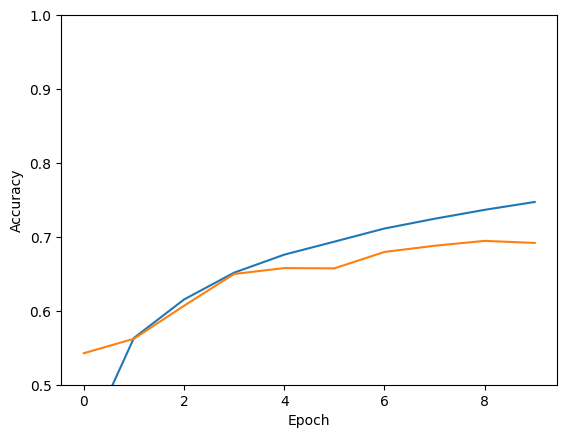

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:" , test_accuracy)


157/157 [==============================] - 0s 3ms/step - loss: 0.8874 - accuracy: 0.6860
Test loss: 0.8874205350875854
Test accuracy: 0.6859999895095825


**Custom model testing**

In [ ]:
def model_prediction(img_path, custom_model, class_labels):
    import warnings
    # Disable all warnings
    warnings.filterwarnings("ignore")

    # Load and preprocess the input image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32,32))

    # Display the input image
    resized_image = tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
    plt.imshow(resized_image)
    plt.axis('off')  # Turn off axis labels
    plt.show()

    input_img = tf.keras.preprocessing.image.img_to_array(img)
    input_img = np.expand_dims(input_img, axis=0)
    # Make predictions on the input image using the custom custom_model
    predictions = custom_model.predict(input_img, verbose=0)
    predicted_class = np.argmax(predictions, axis=1)
    label = class_labels[predicted_class[0]]

    return label

/!\ Prediction 1


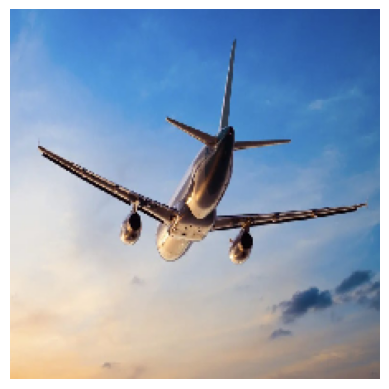


--> Validation: FAIL! ✗

--> Original Label: Airplane
--> Label Prediction: Truck

/!\ Prediction 2


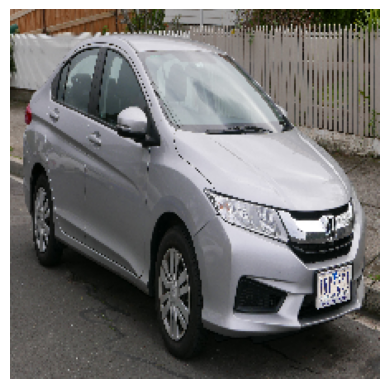


--> Validation: SUCCESS! ✔

--> Original Label: Automobile
--> Label Prediction: Automobile

/!\ Prediction 3


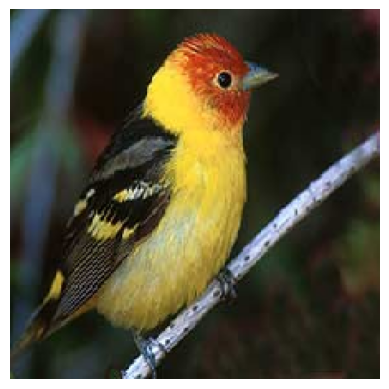


--> Validation: FAIL! ✗

--> Original Label: Bird
--> Label Prediction: Airplane

/!\ Prediction 4


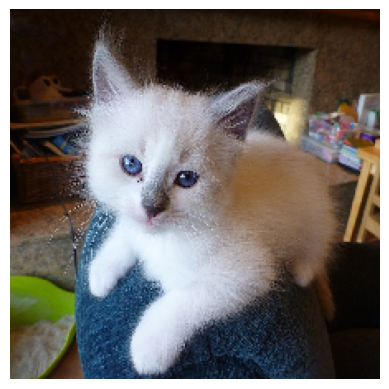


--> Validation: FAIL! ✗

--> Original Label: Cat
--> Label Prediction: Dog

/!\ Prediction 5


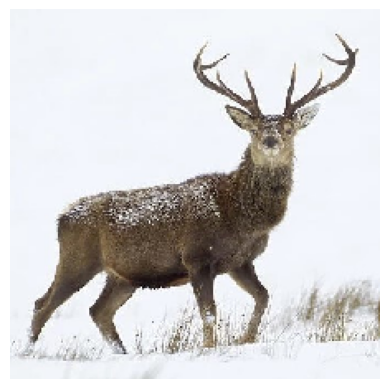


--> Validation: SUCCESS! ✔

--> Original Label: Deer
--> Label Prediction: Deer

/!\ Prediction 6


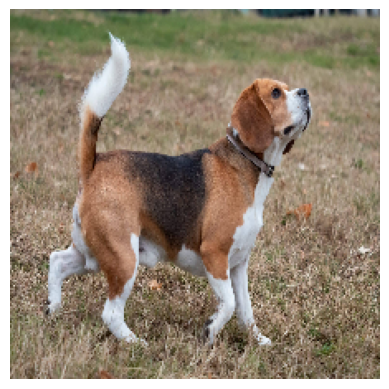


--> Validation: FAIL! ✗

--> Original Label: Dog
--> Label Prediction: Truck

/!\ Prediction 7


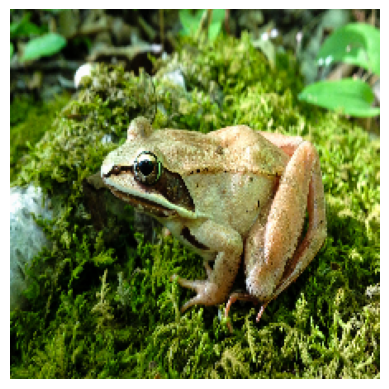


--> Validation: SUCCESS! ✔

--> Original Label: Frog
--> Label Prediction: Frog

/!\ Prediction 8


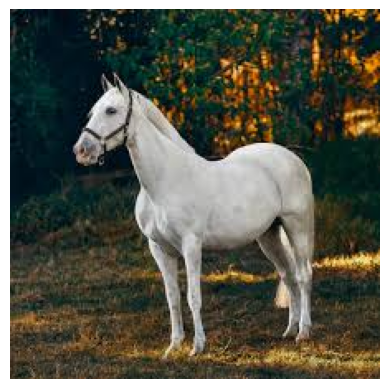


--> Validation: SUCCESS! ✔

--> Original Label: Horse
--> Label Prediction: Horse

/!\ Prediction 9


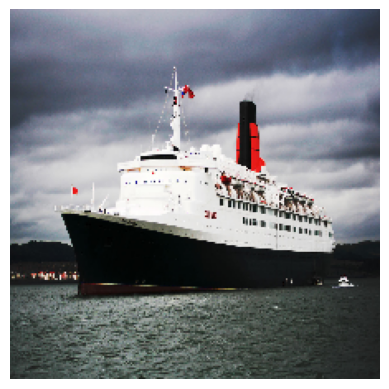


--> Validation: FAIL! ✗

--> Original Label: Ship
--> Label Prediction: Truck

/!\ Prediction 10


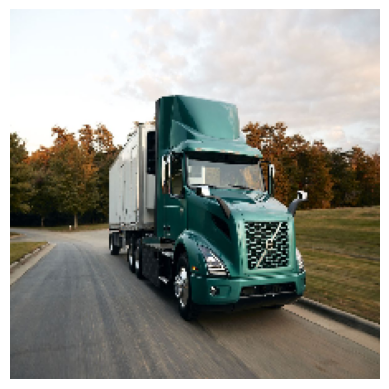


--> Validation: SUCCESS! ✔

--> Original Label: Truck
--> Label Prediction: Truck



In [ ]:
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

images_path = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog',
               'Frog', 'Horse', 'Ship', 'Truck']


# load model
custom_model =  tf.keras.models.load_model(f'model.h5')

for n,(label, img) in enumerate(zip(class_labels, images_path),start=1):
    # load image for test
    img_path = f'{img}.jpg'

    print(f'/!\ Prediction {n}')
    metric = model_prediction(img_path,custom_model, class_labels)
    print(f'\n--> Validation: {"SUCCESS! ✔" if metric == label else "FAIL! ✗"}')
    print(f'\n--> Original Label: {label}')
    print(f'--> Label Prediction: {metric}')
    print('====================================================\n')